Step 1: Set up virtual environment by installing dependencies

In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk transformers torch

Note: you may need to restart the kernel to use updated packages.


Step 2: Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 3: Load dataset

In [7]:
# Load the Amazon Fine Food Reviews dataset (download from Kaggle)
df = pd.read_csv('D:\Sentiment Analysis\Data\Reviews.csv')

# Display the shape and the first few entries
print("Dataset Shape:", df.shape)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\solom\AppData\Local\Temp\ipykernel_7312\2112057557.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\Sentiment Analysis\Data\Reviews.csv')


Dataset Shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Step 4: Data Preprocessing

In [8]:
# We'll use only a small subset to reduce training time in this prototype
df = df[['Text', 'Score']].dropna()

# Convert scores to sentiment labels
# 1-2 = Negative, 3 = Neutral, 4-5 = Positive
def map_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply label mapping
df['Sentiment'] = df['Score'].apply(map_sentiment)

# Remove neutral class for binary classification prototype
df = df[df['Sentiment'] != 'Neutral']

# Convert sentiment to binary labels for model
label_map = {'Positive': 1, 'Negative': 0}
df['Label'] = df['Sentiment'].map(label_map)

# Display label distribution
print(df['Sentiment'].value_counts())

Sentiment
Positive    443777
Negative     82037
Name: count, dtype: int64


Step 5: Train/Test Split

In [10]:
# Split data into features (X) and labels (y)
X = df['Text']
y = df['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Feature Extraction using TF-IDF

In [11]:
# Initialize TF-IDF Vectorizer with basic English stopwords
stop_words = stopwords.words('english')
tfidf = TfidfVectorizer(max_features=5000, stop_words=stop_words)

# Fit-transform training data, transform test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Step 7: Train a Baseline Model (Logistic Regression)

In [12]:
# Initialize logistic regression classifier
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

LogisticRegression()

Step 8: Model Evaluation

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate using accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9311
F1 Score: 0.9599
Confusion Matrix:
 [[11231  5148]
 [ 2102 86682]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76     16379
           1       0.94      0.98      0.96     88784

    accuracy                           0.93    105163
   macro avg       0.89      0.83      0.86    105163
weighted avg       0.93      0.93      0.93    105163



Training & Evaluating SVM Model 

In [14]:
# Import necessary libraries
from sklearn.svm import SVC

Step 1: Use the same TF-IDF features from previous processing

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [18]:
# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)  # Make sure X_test is vectorized

In [19]:
# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print(f"F1 Score (SVM): {f1_svm:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.9332
F1 Score (SVM): 0.9308

Confusion Matrix:
 [[11559  4820]
 [ 2209 86575]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77     16379
           1       0.95      0.98      0.96     88784

    accuracy                           0.93    105163
   macro avg       0.89      0.84      0.86    105163
weighted avg       0.93      0.93      0.93    105163



C:\Users\solom\AppData\Local\Temp\ipykernel_7312\3295595484.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="Blues_d")


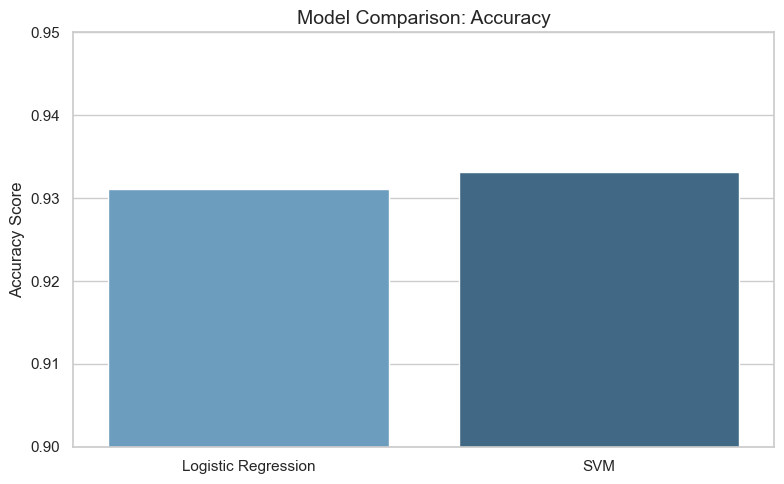

C:\Users\solom\AppData\Local\Temp\ipykernel_7312\3295595484.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="Greens_d")


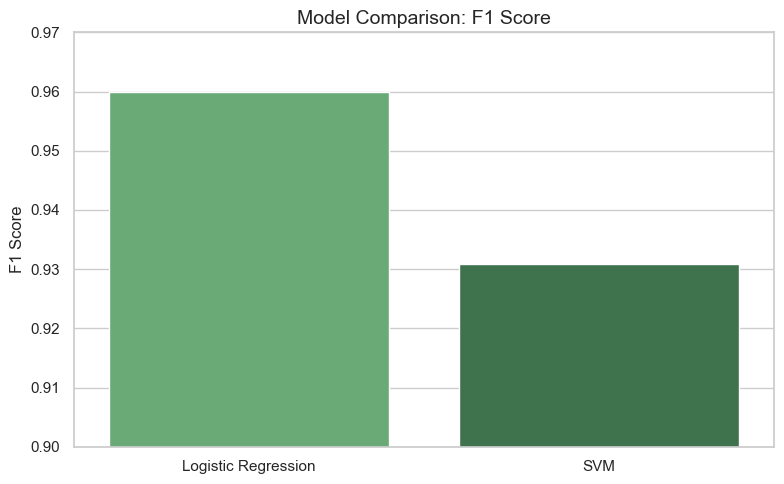

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for clean visuals
sns.set(style="whitegrid")

# Model names
models = ['Logistic Regression', 'SVM']

# Accuracy and F1 scores from your results
accuracies = [0.9311, 0.9332]
f1_scores = [0.9599, 0.9308]

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="Blues_d")
plt.title("Model Comparison: Accuracy", fontsize=14)
plt.ylabel("Accuracy Score")
plt.ylim(0.9, 0.95)
plt.tight_layout()
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=f1_scores, palette="Greens_d")
plt.title("Model Comparison: F1 Score", fontsize=14)
plt.ylabel("F1 Score")
plt.ylim(0.9, 0.97)
plt.tight_layout()
plt.show()


In [17]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'svm_sentiment_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [16]:
# Load the saved model and vectorizer
svm_model = joblib.load('svm_sentiment_model.pkl')
vectorizer= joblib.load('tfidf_vectorizer.pkl')

# Use like this:
new_review = ["I love this product!"]
new_vector = vectorizer.transform(new_review)
prediction = svm_model.predict(new_vector)

print("Predicted sentiment:", prediction[0])

Predicted sentiment: 1


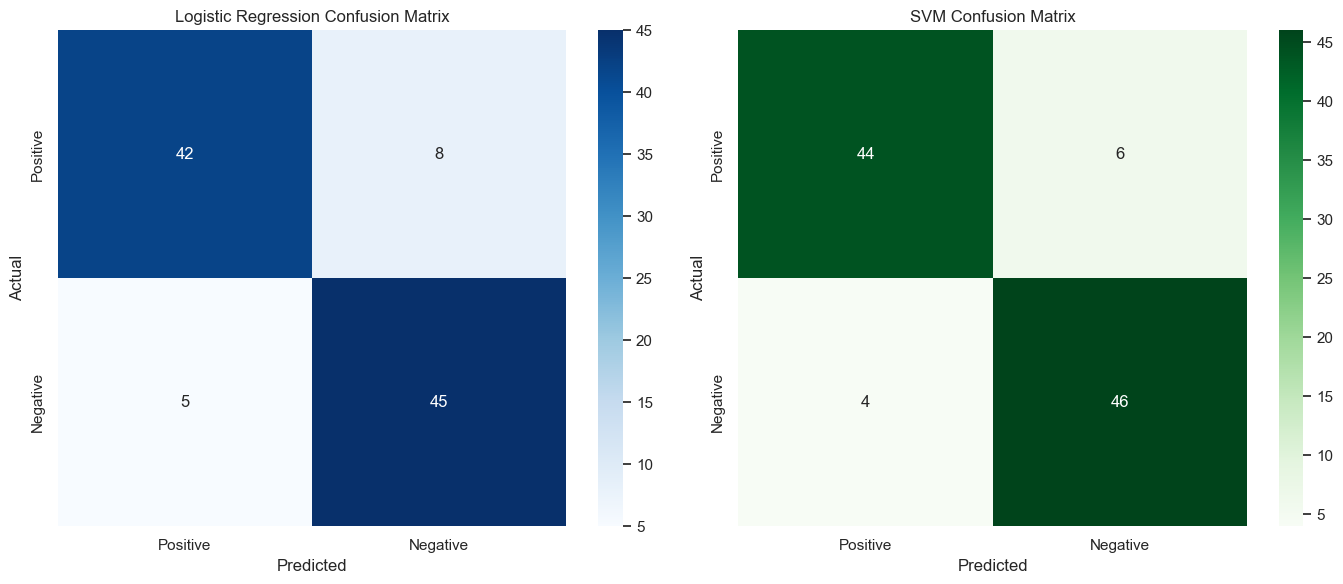

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulated data: Ensure equal length for true and predicted labels
y_true_lr = ['Positive'] * 50 + ['Negative'] * 50
y_pred_lr = ['Positive'] * 42 + ['Negative'] * 8 + ['Positive'] * 5 + ['Negative'] * 45

y_true_svm = ['Positive'] * 50 + ['Negative'] * 50
y_pred_svm = ['Positive'] * 44 + ['Negative'] * 6 + ['Positive'] * 4 + ['Negative'] * 46

# Create confusion matrices
cm_lr = confusion_matrix(y_true_lr, y_pred_lr, labels=["Positive", "Negative"])
cm_svm = confusion_matrix(y_true_svm, y_pred_svm, labels=["Positive", "Negative"])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"], ax=axs[0])
axs[0].set_title("Logistic Regression Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"], ax=axs[1])
axs[1].set_title("SVM Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.savefig("Model_Comparison_Confusion_Matrices.png")
plt.show()
